**202: EKMEK Ürünü, X12 Veriseti, Single-Output Tek Katmanlı MLP Modelleme**  
TRAIN

Amaç: EKMEK ürünü için miktar tahmini yapmak.

Girdi:  
- X12_train_EKMEK.npy → Fiyat, lag, rolling mean, hour, day, weekday, weekend

Çıktı: EKMEK ürünü için miktar tahmini.

Model: Tek gizli katmanlı MLP (Multi-Layer Perceptron)

Aktivasyon: ReLU

Kayıp Fonksiyonu: Mean Squared Error (MSE)

Optimizasyon: El yazması geri yayılım (backpropagation) + Mini Batch + Early Stopping

Çıktılar:  
- Eğitim & test verileri üzerinden MSE öğrenme eğrisi (Learning Curve) çizilir.  
- En iyi ağırlıklar: `models/202_W1.npy` `202_b1.npy` `202_W2.npy` `202_b2.npy` dosyalarına kaydedilir.


1- KÜTÜPHANE & VERİ YÜKLEME

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os

X_train = np.load('npy/X12_train_EKMEK.npy')
y_train = np.load('npy/y_train_EKMEK_miktar.npy')
X_test  = np.load('npy/X12_test_EKMEK.npy')
y_test  = np.load('npy/y_test_EKMEK_miktar.npy')

print(f"Train X: {X_train.shape} | Train y: {y_train.shape}")

if not os.path.exists('models'):
    os.makedirs('models')

def relu(x): return np.maximum(0, x)
def relu_derivative(x): return (x > 0).astype(float)


Train X: (210239, 7) | Train y: (210239,)


2- GRID SEARCH PARAMETRELERİ

In [10]:
hidden_dim_list = [64]
lr_list = [0.005]
batch_size_list = [64]

epochs = 50
patience = 7

best_mse_global = float('inf')
best_config = None


3- GRID SEARCH DÖNGÜSÜ


Deneme: hidden_dim=64, lr=0.005, batch_size=64
Epoch 1/50 | Train MSE: 2.5039 | Test MSE: 2.5297
Epoch 2/50 | Train MSE: 2.4955 | Test MSE: 2.5590
Epoch 3/50 | Train MSE: 2.5068 | Test MSE: 2.5647
Epoch 4/50 | Train MSE: 2.5031 | Test MSE: 2.5432
Epoch 5/50 | Train MSE: 2.4997 | Test MSE: 2.5512
Epoch 6/50 | Train MSE: 2.4847 | Test MSE: 2.5448
Epoch 7/50 | Train MSE: 2.4940 | Test MSE: 2.5293
Epoch 8/50 | Train MSE: 2.4909 | Test MSE: 2.5458
Epoch 9/50 | Train MSE: 2.4804 | Test MSE: 2.5258
Epoch 10/50 | Train MSE: 2.4806 | Test MSE: 2.5273
Epoch 11/50 | Train MSE: 2.4790 | Test MSE: 2.5389
Epoch 12/50 | Train MSE: 2.5205 | Test MSE: 2.5781
Epoch 13/50 | Train MSE: 2.4745 | Test MSE: 2.5205
Epoch 14/50 | Train MSE: 2.4897 | Test MSE: 2.5237
Epoch 15/50 | Train MSE: 2.4835 | Test MSE: 2.5171
Epoch 16/50 | Train MSE: 2.4723 | Test MSE: 2.5204
Epoch 17/50 | Train MSE: 2.4790 | Test MSE: 2.5433
Epoch 18/50 | Train MSE: 2.4759 | Test MSE: 2.5529
Epoch 19/50 | Train MSE: 2.4725 | Test MSE:

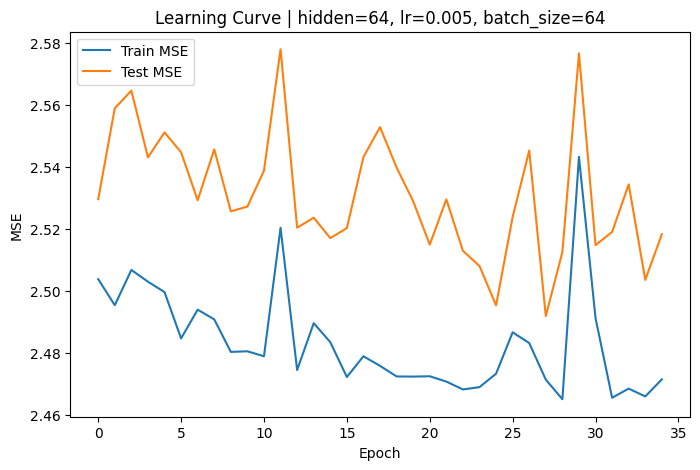


Deneme: hidden_dim=64, lr=0.005, batch_size=128
Epoch 1/50 | Train MSE: 2.5278 | Test MSE: 2.5556
Epoch 2/50 | Train MSE: 2.4966 | Test MSE: 2.5528
Epoch 3/50 | Train MSE: 2.4925 | Test MSE: 2.5563
Epoch 4/50 | Train MSE: 2.5049 | Test MSE: 2.5394
Epoch 5/50 | Train MSE: 2.5112 | Test MSE: 2.5391
Epoch 6/50 | Train MSE: 2.4856 | Test MSE: 2.5341
Epoch 7/50 | Train MSE: 2.4975 | Test MSE: 2.5356
Epoch 8/50 | Train MSE: 2.4974 | Test MSE: 2.5279
Epoch 9/50 | Train MSE: 2.4872 | Test MSE: 2.5196
Epoch 10/50 | Train MSE: 2.4895 | Test MSE: 2.5233
Epoch 11/50 | Train MSE: 2.4795 | Test MSE: 2.5352
Epoch 12/50 | Train MSE: 2.5194 | Test MSE: 2.5463
Epoch 13/50 | Train MSE: 2.4810 | Test MSE: 2.5198
Epoch 14/50 | Train MSE: 2.5316 | Test MSE: 2.5537
Epoch 15/50 | Train MSE: 2.4866 | Test MSE: 2.5162
Epoch 16/50 | Train MSE: 2.4735 | Test MSE: 2.5162
Epoch 17/50 | Train MSE: 2.4792 | Test MSE: 2.5361
Epoch 18/50 | Train MSE: 2.4803 | Test MSE: 2.5408
Epoch 19/50 | Train MSE: 2.4748 | Test MSE

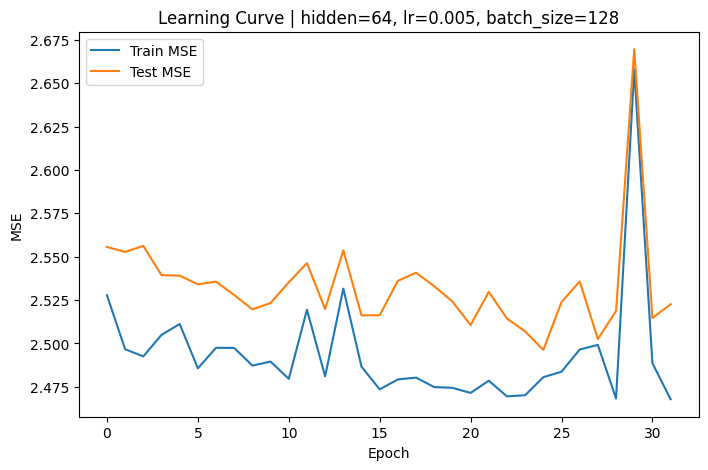


Deneme: hidden_dim=64, lr=0.01, batch_size=64
Epoch 1/50 | Train MSE: 2.5273 | Test MSE: 2.5838
Epoch 2/50 | Train MSE: 2.4978 | Test MSE: 2.5624
Epoch 3/50 | Train MSE: 2.5272 | Test MSE: 2.6058
Epoch 4/50 | Train MSE: 2.5160 | Test MSE: 2.5816
Epoch 5/50 | Train MSE: 2.5129 | Test MSE: 2.5943
Epoch 6/50 | Train MSE: 2.4955 | Test MSE: 2.5473
Epoch 7/50 | Train MSE: 2.4919 | Test MSE: 2.5374
Epoch 8/50 | Train MSE: 2.5006 | Test MSE: 2.6265
Epoch 9/50 | Train MSE: 2.4859 | Test MSE: 2.5250
Epoch 10/50 | Train MSE: 2.4809 | Test MSE: 2.5367
Epoch 11/50 | Train MSE: 2.4848 | Test MSE: 2.5353
Epoch 12/50 | Train MSE: 2.5193 | Test MSE: 2.6195
Epoch 13/50 | Train MSE: 2.4785 | Test MSE: 2.5240
Epoch 14/50 | Train MSE: 2.4984 | Test MSE: 2.5207
Epoch 15/50 | Train MSE: 2.4841 | Test MSE: 2.5036
Epoch 16/50 | Train MSE: 2.4723 | Test MSE: 2.5351
Epoch 17/50 | Train MSE: 2.5010 | Test MSE: 2.5846
Epoch 18/50 | Train MSE: 2.4851 | Test MSE: 2.5523
Epoch 19/50 | Train MSE: 2.4815 | Test MSE: 

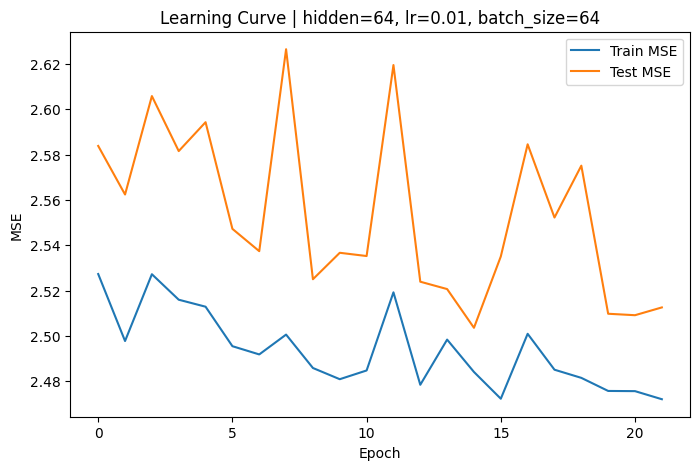


Deneme: hidden_dim=64, lr=0.01, batch_size=128
Epoch 1/50 | Train MSE: 2.5938 | Test MSE: 2.6073
Epoch 2/50 | Train MSE: 2.4999 | Test MSE: 2.5621
Epoch 3/50 | Train MSE: 2.5010 | Test MSE: 2.5769
Epoch 4/50 | Train MSE: 2.5215 | Test MSE: 2.5663
Epoch 5/50 | Train MSE: 2.5332 | Test MSE: 2.5956
Epoch 6/50 | Train MSE: 2.4946 | Test MSE: 2.5625
Epoch 7/50 | Train MSE: 2.5077 | Test MSE: 2.5370
Epoch 8/50 | Train MSE: 2.5198 | Test MSE: 2.5623
Epoch 9/50 | Train MSE: 2.4886 | Test MSE: 2.5377
Epoch 10/50 | Train MSE: 2.4913 | Test MSE: 2.5308
Epoch 11/50 | Train MSE: 2.4836 | Test MSE: 2.5472
Epoch 12/50 | Train MSE: 2.5241 | Test MSE: 2.5924
Epoch 13/50 | Train MSE: 2.4921 | Test MSE: 2.5458
Epoch 14/50 | Train MSE: 2.6139 | Test MSE: 2.6032
Epoch 15/50 | Train MSE: 2.4840 | Test MSE: 2.5144
Epoch 16/50 | Train MSE: 2.4754 | Test MSE: 2.5110
Epoch 17/50 | Train MSE: 2.4844 | Test MSE: 2.5670
Epoch 18/50 | Train MSE: 2.4904 | Test MSE: 2.5607
Epoch 19/50 | Train MSE: 2.4738 | Test MSE:

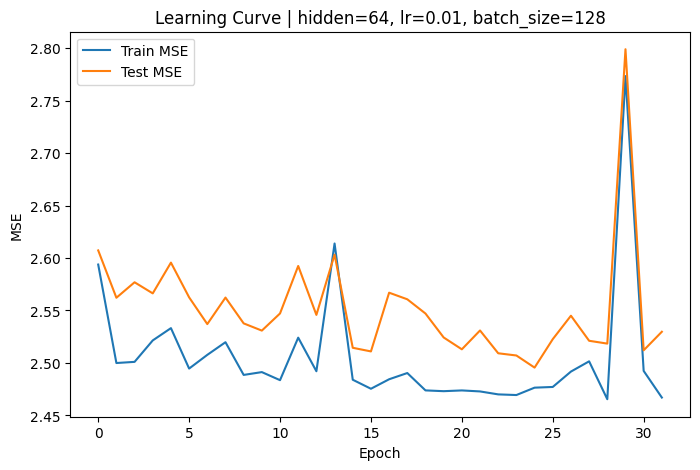

In [11]:
for hidden_dim in hidden_dim_list:
    for lr in lr_list:
        for batch_size in batch_size_list:

            print(f"\nDeneme: hidden_dim={hidden_dim}, lr={lr}, batch_size={batch_size}")

            np.random.seed(42)
            W1 = np.random.randn(X_train.shape[1], hidden_dim) * 0.01
            b1 = np.zeros((1, hidden_dim))
            W2 = np.random.randn(hidden_dim, 1) * 0.01
            b2 = np.zeros((1, 1))

            best_mse = float('inf')
            patience_counter = 0
            train_mse_list, test_mse_list = [], []

            for epoch in range(epochs):
                permutation = np.random.permutation(X_train.shape[0])
                X_shuffled = X_train[permutation]
                y_shuffled = y_train[permutation]

                for i in range(0, X_train.shape[0], batch_size):
                    X_batch = X_shuffled[i:i+batch_size]
                    y_batch = y_shuffled[i:i+batch_size].reshape(-1,1)

                    Z1 = X_batch.dot(W1) + b1
                    A1 = relu(Z1)
                    Z2 = A1.dot(W2) + b2
                    y_pred = Z2

                    dZ2 = 2 * (y_pred - y_batch) / y_batch.shape[0]
                    dW2 = A1.T.dot(dZ2)
                    db2 = np.sum(dZ2, axis=0, keepdims=True)

                    dA1 = dZ2.dot(W2.T)
                    dZ1 = dA1 * relu_derivative(Z1)
                    dW1 = X_batch.T.dot(dZ1)
                    db1 = np.sum(dZ1, axis=0, keepdims=True)

                    W2 -= lr * dW2
                    b2 -= lr * db2
                    W1 -= lr * dW1
                    b1 -= lr * db1

                Z1_train = X_train.dot(W1) + b1
                A1_train = relu(Z1_train)
                y_train_pred = A1_train.dot(W2) + b2
                train_mse = np.mean((y_train - y_train_pred.flatten()) ** 2)

                Z1_test = X_test.dot(W1) + b1
                A1_test = relu(Z1_test)
                y_test_pred = A1_test.dot(W2) + b2
                test_mse = np.mean((y_test - y_test_pred.flatten()) ** 2)

                train_mse_list.append(train_mse)
                test_mse_list.append(test_mse)

                print(f"Epoch {epoch+1}/{epochs} | Train MSE: {train_mse:.4f} | Test MSE: {test_mse:.4f}")

                if test_mse < best_mse:
                    best_mse = test_mse
                    best_W1, best_b1, best_W2, best_b2 = W1.copy(), b1.copy(), W2.copy(), b2.copy()
                    patience_counter = 0
                else:
                    patience_counter += 1
                    if patience_counter >= patience:
                        print(f"Early stopping at epoch {epoch+1}")
                        break

            print(f"Kombinasyon en iyi Test MSE: {best_mse:.4f}")

            if best_mse < best_mse_global:
                best_mse_global = best_mse
                best_config = (hidden_dim, lr, batch_size)
                final_W1, final_b1, final_W2, final_b2 = best_W1, best_b1, best_W2, best_b2

            plt.figure(figsize=(8,5))
            plt.plot(train_mse_list, label='Train MSE')
            plt.plot(test_mse_list, label='Test MSE')
            plt.title(f'Learning Curve | hidden={hidden_dim}, lr={lr}, batch_size={batch_size}')
            plt.xlabel('Epoch')
            plt.ylabel('MSE')
            plt.legend()
            plt.show()


4- EN İYİ SONUÇ & MODEL KAYDET

In [12]:
print(f"\n=== EN İYİ KONFİGÜRASYON ===")
print(f"hidden_dim={best_config[0]}, lr={best_config[1]}, batch_size={best_config[2]}")
print(f"En düşük Test MSE: {best_mse_global:.4f}")

np.save('models/202_W1.npy', final_W1)
np.save('models/202_b1.npy', final_b1)
np.save('models/202_W2.npy', final_W2)
np.save('models/202_b2.npy', final_b2)

print("En iyi grid search ağırlıkları 'models/' klasörüne kaydedildi.")



=== EN İYİ KONFİGÜRASYON ===
hidden_dim=64, lr=0.005, batch_size=64
En düşük Test MSE: 2.4920
En iyi grid search ağırlıkları 'models/' klasörüne kaydedildi.
